In [237]:
#Ricardo Figueroa CU 112714
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from scipy.stats import norm
from sklearn import preprocessing, linear_model
from random import random
import requests
import csv
from sklearn.naive_bayes import MultinomialNB

In [238]:
#se leen datos del repositorio
CSV_URL = 'https://raw.githubusercontent.com/ClaseML-2017/MaterialyTareas/master/datos/regLinPoli.csv'
with requests.Session() as s:
    download = s.get(CSV_URL)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)

In [239]:
#se incluyen los datos en data frame y se transforman en float
df = pd.DataFrame(my_list)[1:]
df

,0,1,2,3,4,5
1,7.317937976,53.55221622,0.864388724,0.859736061,114,50.55221622
2,1.284357331,1.649573754,0.108685869,0.959256075,115,2.649573754
3,97.74065218,9553.235089,1.990075233,-0.344099847,116,9643.235089
4,17.75359136,315.1900062,1.249286219,-0.889369649,117,310.1900062
5,66.44108134,4414.41729,1.822436692,-0.45077701,118,4390.41729
6,40.91616347,1674.132433,1.611894905,-0.075387382,119,1647.132433
7,95.68703527,9156.008719,1.980853099,0.991360994,120,9077.008719
8,83.68526187,7003.223054,1.922648979,0.907687319,121,7057.223054
9,39.87342608,1589.890107,1.600683554,0.82334415,122,1569.890107
10,90.67894485,8222.671039,1.957506458,0.414362387,123,8263.671039


In [240]:
index=np.array([1 if random() < 0.75 else 0 for i in range(len(df))])

In [241]:
#se incluyen las variables en arreglos independientes, es necesario un reshape para que los datos puedan ser leidos por el fit
X_train= np.array(df[df.columns[0:-1]])[index==1]
X_train = X_train.astype(float)
X_test=np.array(df[df.columns[0:-1]])[index==0]
X_test = X_test.astype(float)
Y_train=np.array(df[[df.columns[-1]]])[index==1]
Y_train = Y_train.astype(float)
Y_test= np.array(df[[df.columns[-1]]])[index==0]
Y_test = Y_test.astype(float)
Y_test2 = Y_test
X_test2 = X_test
WisTrain = np.array([1.0 for i in range(0,X_train.shape[1])])

In [242]:
from sklearn import preprocessing
scaleX = preprocessing.StandardScaler()
scaleY = preprocessing.StandardScaler()
scaleX.fit(X_train)
X_train = scaleX.transform(X_train)
scaleY.fit(Y_train)
Y_train = scaleY.transform(Y_train)

In [243]:
# algoritmo para ajustar coeficientes
# Importante estandarizar /len(x)
def ajustarCoef(x, y, w, aprend, lambd):
    
    w0 = 1
    error = 0.0
    YTemp = 0.0
    ErrorList=list()
    w = np.array([1.0 for i in range(0,X_train.shape[1])])
    
    for i in range(0,x.shape[0]):
        error = y[i]-np.dot(x[i][:],w)-w0
        ErrorList.append(error) 
        gradiente = error*aprend
        w0 = gradiente + w0
        for k in range(0,x.shape[1]):        
            w[k] =(gradiente*x[i][k]) - (lambd*w[k]) + w[k]
            
    return w0, w, ErrorList

In [244]:
def reRun(n,lambd):
    for i in range(0,n):
        W0 = ajustarCoef(X_train, Y_train, WisTrain, 0.05, lambd)[0]
        W1 = ajustarCoef(X_train, Y_train, WisTrain, 0.05, lambd)[1]
        ErrorList = ajustarCoef(X_train, Y_train, WisTrain, 0.05, lambd)[2]
        
    return W0, W1, ErrorList

In [245]:
X_test2=scaleX.transform(X_test2)
Y_test2=scaleY.transform(Y_test2)

In [246]:
def Testing(lambd):    
    Test = reRun(50,lambd)
    W0_1000 = Test[0]
    W1_1000 = Test[1]
    error_sum = 0
    
    for i in range(len(X_test2)): 
        y = np.dot(X_test2[i],W1_1000) + W0_1000
        error = (y - Y_test2[i])**2
        error_sum=error_sum+error
    
    return error_sum/len(X_test2)

In [251]:
lambdaArray = np.array([0.0,0.01,0.02,0.07,0.09,0.11,0.13,0.15,0.17,0.19,0.21,0.23,0.25,0.27,0.29,0.31,0.33,0.35,0.37,0.39,0.41,1])
results_Array = np.array([1.0 for i in range(0,lambdaArray.shape[0])])
for i in range(len(lambdaArray)):
    results_Array[i]= Testing(lambdaArray[i])
results_Array

array([ 1.52737369,  0.02450733,  0.05361392,  0.17196331,  0.2133982 ,
        0.25230025,  0.28859595,  0.32223006,  0.353207  ,  0.38158876,
        0.40748095,  0.43101834,  0.45235278,  0.47164398,  0.48905288,
        0.50473683,  0.51884645,  0.53152354,  0.54289997,  0.55309714,
        0.56222596,  0.61744878])

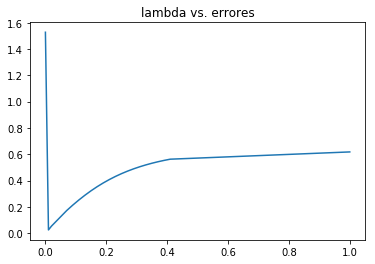

In [252]:
plt.plot(lambdaArray,results_Array)
plt.title('lambda vs. errores')
plt.show()